In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
import math

In [ ]:
drive.mount('/content/drive')

def cargar_dataset(ruta_archivo):
    try:
        if not os.path.exists(ruta_archivo):
            raise FileNotFoundError(f"No se encontro el archivo: {ruta_archivo}")
        delimitadores = [';', ',', '\t']
        df = None

        for delim in delimitadores:
            try:
                df_temp = pd.read_csv(ruta_archivo, delimiter=delim, encoding='utf8')
                if df_temp.shape[1] > 1:
                    df = df_temp
                    print(f"Dataset cargado desde: {ruta_archivo}")
                    break
            except Exception:
                continue

        if df is None:
            df = pd.read_csv(ruta_archivo, delimiter=';')
            print(f"Dataset cargado desde: {ruta_archivo}")

        return df
    except Exception as e:
        print(f"Error al cargar el dataset: {e}")
        return None

RUTA_CSV = '/content/drive/MyDrive/segment1.csv'

print("Cargando dataset ...")
df = cargar_dataset(RUTA_CSV)

if df is None:
    print("No se pudo cargar el dataset.")
    raise SystemExit("Script detenido debido a error en carga del dataset.")

print("Verificando estructura del dataset")

if df.shape[1] == 1:
    print("Dataset con delimitador incorrecto.")
    columna_completa = df.columns[0]

    if ';' in columna_completa:
        nuevas_columnas = columna_completa.split(';')

        datos_divididos = []
        for _, fila in df.iterrows():
            valores = str(fila.iloc[0]).split(';')
            datos_divididos.append(valores)

        df = pd.DataFrame(datos_divididos, columns=nuevas_columnas)
        print("Dataset solucionado")
    else:
        print("El dataset tiene una sola columna pero no se pudo solucionar.")


print("Forma del dataset después de procesar:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())

print("\nNombres de las columnas:")
print("Columnas:", list(df.columns))

print("\nTipos de datos:")
print(df.dtypes)

print("\nValores nulos por columna:")
print(df.isnull().sum())

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cargando dataset ...
Dataset cargado desde: /content/drive/MyDrive/segment1.csv
Verificando estructura del dataset
Forma del dataset después de procesar: (1228, 7)

Primeras 5 filas:
   segment               x1                        x2  duration  distance  \
0        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1       198       165   
1        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1       188       178   
2        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1        45       148   
3        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1        45       162   
4        1  LRT TMN BAHAGIA  RUMAH NO. 57  JLN SS4A/1       159       176   

   weather  peak  
0        1     0  
1        1     0  
2        1     0  
3        1     0  
4        1     0  

Nombres de las columnas:
Columnas: ['segment', 'x1', 'x2', 'duration', 'distance', 'weather', 'peak']

Tipos d

,segment,x1,x2,duration,distance,weather,peak
0,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,198,165,1,0
1,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,188,178,1,0
2,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,45,148,1,0
3,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,45,162,1,0
4,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,159,176,1,0
...,...,...,...,...,...,...,...
1223,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,38,160,1,0
1224,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,106,135,1,0
1225,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,106,146,1,0
1226,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,83,132,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Features y target
X = df[['distance','weather','peak']].values
y = df['duration'].values

# Train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalado
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(C=54, cache_size=500, epsilon=48, kernel='rbf', gamma='auto')
model.fit(X_train, y_train)

pred_y = model.predict(X_test)

mse =mean_squared_error(y_test, pred_y)
print("Mean Squared Error:",mse)

rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 6850.383154532627
Root Mean Squared Error: 82.76704147504988


In [ ]:
# =======================
# 2. Baseline
# =======================
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print("Baseline R²:", r2_score(y_test, y_pred_dummy))

Baseline R²: -0.014357312046411996


In [ ]:
# =======================
# 3. SVR con GridSearchCV
# =======================
param_grid = {
    'C': [1, 10, 50, 100, 200],
    'epsilon': [0.1, 1, 5, 10, 20],
    'gamma': ['scale', 'auto']
}

grid_svr = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5,
                        scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_svr.fit(X_train, y_train)

best_svr = grid_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
# =======================
# 4. Otros modelos (para comparar)
# =======================
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [ ]:
# =======================
# 5. Tabla de métricas
# =======================
duration_mean = np.mean(y_test)

results = pd.DataFrame({
    "Modelo": ["Baseline", "SVR", "Random Forest", "Gradient Boosting"],
    "MSE": [
        mean_squared_error(y_test, y_pred_dummy),
        mean_squared_error(y_test, y_pred_svr),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_gb)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_dummy)),
        np.sqrt(mean_squared_error(y_test, y_pred_svr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gb))
    ],
    "R²": [
        r2_score(y_test, y_pred_dummy),
        r2_score(y_test, y_pred_svr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gb)
    ]
})

# Error relativo porcentual respecto a la media
results["Error Relativo (%)"] = 100 * results["RMSE"] / duration_mean

print(results)

              Modelo           MSE        RMSE        R²  Error Relativo (%)
0           Baseline   7224.000546   84.994121 -0.014357           78.838550
1                SVR   6849.579436   82.762186  0.038217           76.768260
2      Random Forest  10535.979102  102.644918 -0.479408           95.211015
3  Gradient Boosting   9245.613852   96.154115 -0.298222           89.190299


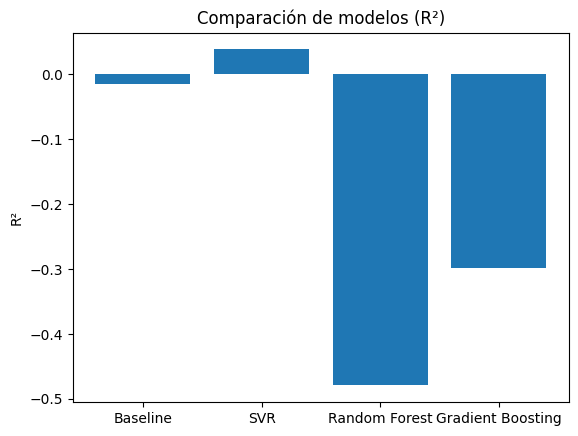

In [ ]:
# =======================
# 6. Gráfico comparativo de R²
# =======================
plt.bar(results["Modelo"], results["R²"])
plt.title("Comparación de modelos (R²)")
plt.ylabel("R²")
plt.show()

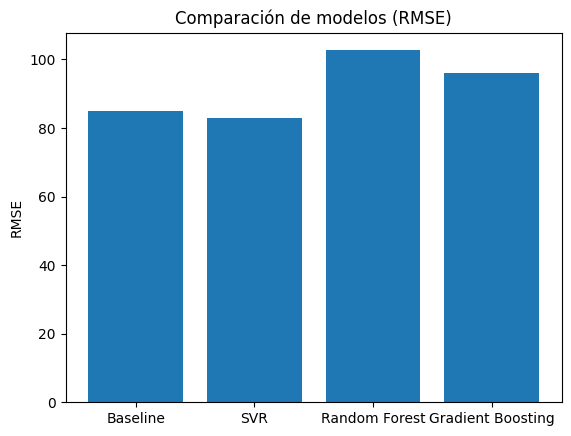

In [ ]:
# =======================
# 7. Gráfico comparativo de RMSE
# =======================
plt.bar(results["Modelo"], results["RMSE"])
plt.title("Comparación de modelos (RMSE)")
plt.ylabel("RMSE")
plt.show()

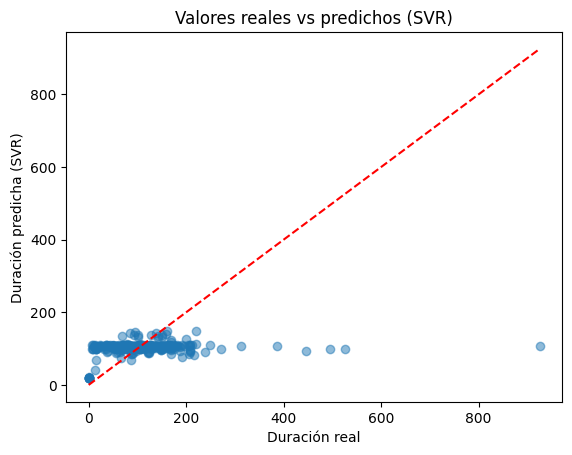

In [ ]:

# =======================
# 8. Scatter plot del mejor modelo
# =======================
# Elegimos el modelo con mejor R²
best_idx = results["R²"].idxmax()
best_model_name = results.loc[best_idx, "Modelo"]

if best_model_name == "SVR":
    best_preds = y_pred_svr
elif best_model_name == "Random Forest":
    best_preds = y_pred_rf
elif best_model_name == "Gradient Boosting":
    best_preds = y_pred_gb
else:
    best_preds = y_pred_dummy

plt.scatter(y_test, best_preds, alpha=0.5)
plt.xlabel("Duración real")
plt.ylabel(f"Duración predicha ({best_model_name})")
plt.title(f"Valores reales vs predichos ({best_model_name})")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # línea ideal
plt.show()